## Модель биовозраста
Цель - предсказать возраст на основе следующих показателей:
1. 'АДС' - давление систолитическое
2. 'АДД' - давление дистолитическое
3. 'АДП' -  разница между систолитическим и дистолитическим давлением,
4. 'ЗДВдох' - задержка дыхания на вдохе, 
5. 'ЗДВыдох' - задержка дыхания на выдохе, 
6. 'ЖЕЛ' - жизненная емкость легких, 
7. 'Масса тела', 
8. 'Аккомодация',
9. 'Острота слуха', 
10. 'Стат.балансировка - время сколько может простоят на левой ноге, с

В предыдущих работах показали, что модули биовозраста зависят от пола, поэтому берем только данные мужчин практически здоровых. Их мало (ну не хотят они ходить в больницу -))

In [1]:
import pymc as pm
import arviz as az
import pandas as pd
import numpy as np

C:\Users\Main\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Main\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Main\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [12]:
import matplotlib.pyplot as plt

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_excel('../data_preparing/cluster_m_amb.xlsx')

In [5]:
df.columns

Index(['Unnamed: 0', 'состояние', 'пол', 'возраст', 'АДС', 'АДД', 'АДП',
       'ЗДВдох', 'ЗДВыдох', 'ЖЕЛ', 'Масса тела', 'Аккомодация',
       'Острота слуха', 'Стат.балансировка', 'id_pat', 'cluster'],
      dtype='object')

In [6]:
x_40 = df[df['возраст'] >= 40][['АДС', 'АДД', 'АДП',
       'ЗДВдох', 'ЗДВыдох', 'ЖЕЛ', 'Масса тела', 'Аккомодация',
       'Острота слуха', 'Стат.балансировка']]
y_40 = df[df['возраст'] >=40]['возраст']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_40,y_40, test_size = 0.2, random_state = 1)

In [16]:
x_train.shape

(187, 10)

In [17]:
x_test.shape

(47, 10)

In [18]:
scaller = StandardScaler()
x_train_transformed = scaller.fit_transform(x_train)
y_train_transformed = scaller.fit_transform(y_train.values.reshape(-1,1))

In [11]:
scaller = StandardScaler()
x_test_transformed = scaller.fit_transform(x_test)
y_test_transformed = scaller.fit_transform(y_test.values.reshape(-1,1))

In [12]:
scaller = StandardScaler()
x_transformed = scaller.fit_transform(x_40)
y_transformed = scaller.fit_transform(y_40.values.reshape(-1,1))

In [7]:
def trans(df):
    transformed = scaller.fit_transform(df.values.reshape(-1, 1))
    df_trans = pd.Series(transformed.ravel())
    return df_trans


In [8]:
def dist_norm(mu, sigma, df):
    t_dist = pm.Normal.dist(mu = mu, sigma = sigma)
    x_eval = np.linspace(-6, 6, 300)
    plt.plot(x_eval, pm.math.exp(pm.logp(t_dist, x_eval)).eval(), label="Normal", lw=2.0)
    df.plot.kde()
    plt.xlabel("x")
    plt.ylabel("Probability density")
    plt.legend()

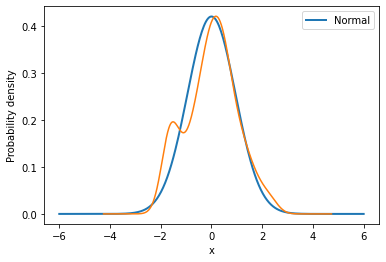

In [19]:
dist_norm(0.0, 0.95, trans(df['возраст']))

### Ищем подходящее распределение для фичей

АДС

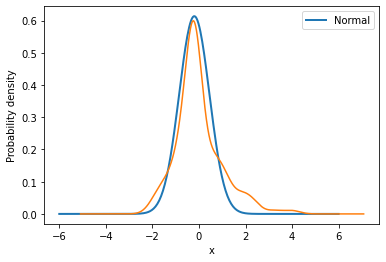

In [27]:
dist_norm(-0.2, 0.65, trans(x_40['АДС']))

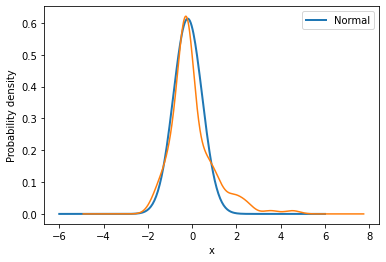

In [57]:
dist_norm(-0.2, 0.65, trans(x_40['АДС']*x_40['АДС']))

АДД

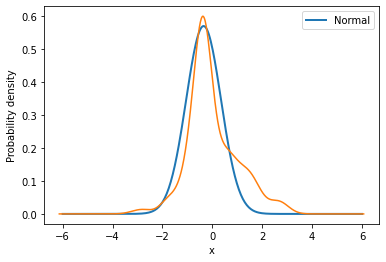

In [29]:
dist_norm(-0.35, 0.7, trans(x_40['АДД']))

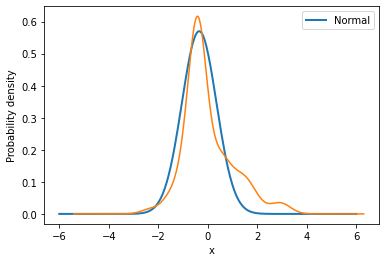

In [58]:
dist_norm(-0.35, 0.7, trans(x_40['АДД']*x_40['АДД']))

АДП

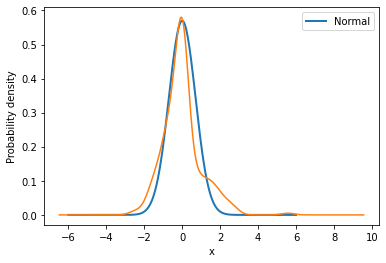

In [22]:
dist_norm(0, 0.7, trans(x_40['АДП']))

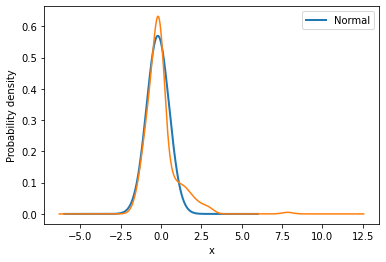

In [61]:
dist_norm(-0.2, 0.7, trans(x_40['АДП']*x_40['АДП']))

ЗДВдох

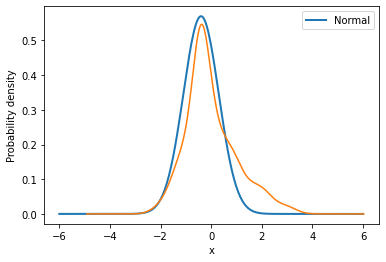

In [21]:
dist_norm(-0.4, 0.7, trans(x_40['ЗДВдох']))

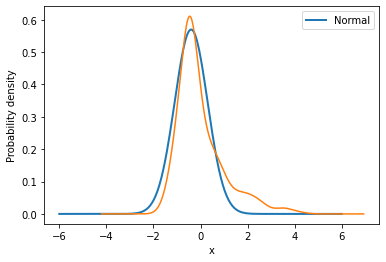

In [62]:
dist_norm(-0.4, 0.7, trans(x_40['ЗДВдох']*x_40['ЗДВдох']))

ЗДВыдох

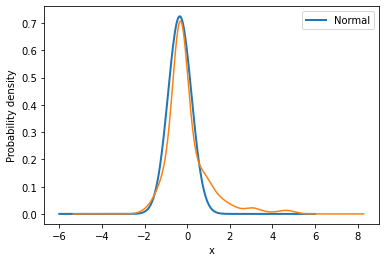

In [19]:
dist_norm(-0.35, 0.55, trans(x_40['ЗДВыдох']))

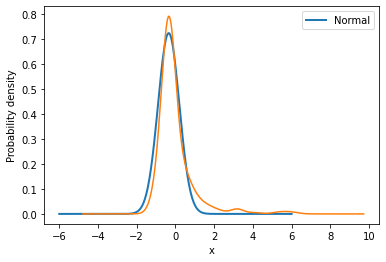

In [63]:
dist_norm(-0.35, 0.55, trans(x_40['ЗДВыдох']*x_40['ЗДВыдох']))

ЖЕЛ

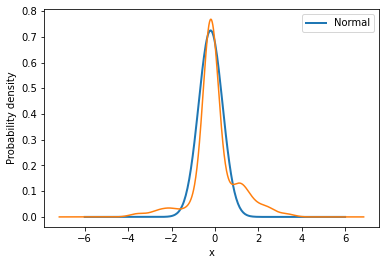

In [17]:
dist_norm(-0.2, 0.55, trans(x_40['ЖЕЛ']))

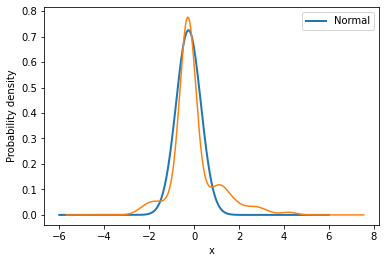

In [65]:
dist_norm(-0.25, 0.55, trans(x_40['ЖЕЛ']*x_40['ЖЕЛ']))

Масса тела

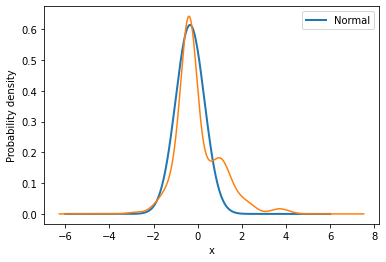

In [15]:
dist_norm(-0.35, 0.65, trans(x_40['Масса тела']))

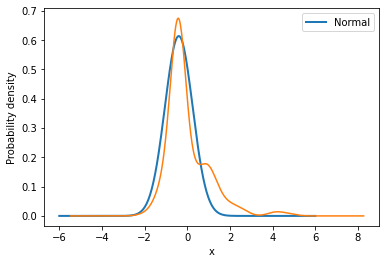

In [67]:
dist_norm(-0.4, 0.65, trans(x_40['Масса тела']*x_40['Масса тела']))

Аккомодация

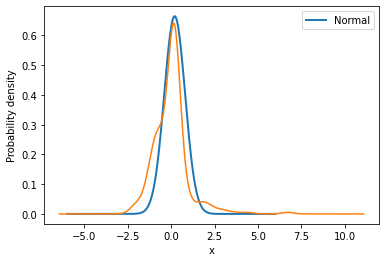

In [14]:
dist_norm(0.2, 0.6, trans(x_40['Аккомодация']))

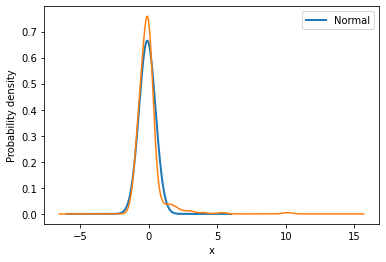

In [73]:
dist_norm(-0.1, 0.6, trans(x_40['Аккомодация']*x_40['Аккомодация']))

Острота слуха

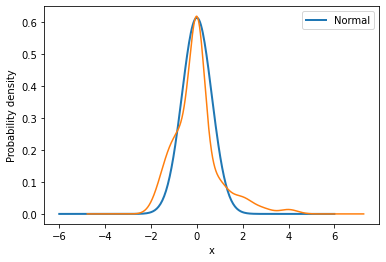

In [13]:
dist_norm(0.0, 0.65, trans(x_40['Острота слуха']))

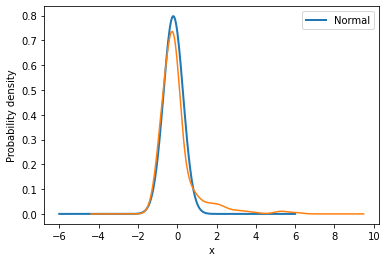

In [76]:
dist_norm(-0.2, 0.5, trans(x_40['Острота слуха']*x_40['Острота слуха']))

Стат.балансировка

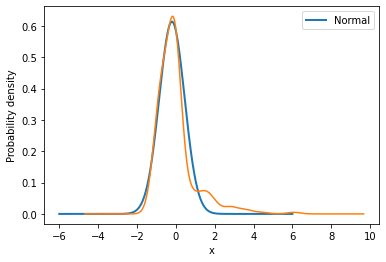

In [12]:
dist_norm(-0.2, 0.65, trans(x_40['Стат.балансировка']))

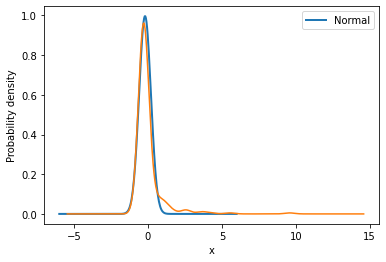

In [78]:
dist_norm(-0.2, 0.4, trans(x_40['Стат.балансировка']*x_40['Стат.балансировка']))

возраст

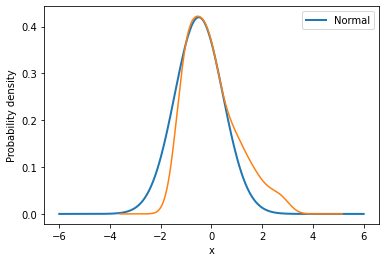

In [11]:
dist_norm(-0.5, 0.95, trans(y_40))

попробуем построить модель

In [52]:
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    ads = pm.Normal("ads", mu=-0.2, sigma=0.65)
    add = pm.Normal('add', mu = -0.35, sigma = 0.7)
    adp = pm.Normal("adp", mu = 0, sigma = 0.7)
    zdin = pm.Normal("zdin", mu = -0.4, sigma = 0.7)
    zdout = pm.Normal("zdout", mu = -0.35, sigma = 0.55)
    gel = pm.Normal("gel", mu = -0.2, sigma = 0.55)
    massa = pm.Normal("massa", mu = -0.35, sigma = 0.65)
    akkom = pm.Normal("akkom", mu = 0.2, sigma = 0.6)
    sluh = pm.Normal("sluh", mu = 0, sigma = 0.65)
    balance = pm.Normal("balance", mu = -0.2, sigma = 0.65)
    epsilon = pm.Normal("epsilon", mu=-0.1, sigma=1)
    

    # Expected value of outcome
    mu = epsilon + ads*trans(x_train['АДС']) + add*trans(x_train['АДД']) + adp*trans(x_train['АДП']) + zdin*trans(x_train['ЗДВдох']) + \
     zdout * trans(x_train['ЗДВыдох']) + gel * trans(x_train['ЖЕЛ']) + massa * trans(x_train['Масса тела']) + \
    akkom * trans(x_train['Аккомодация']) + sluh * trans(x_train['Острота слуха']) + balance * trans(x_train['Стат.балансировка'])
        

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=0.95, observed=trans(y_train))

In [53]:
with basic_model:
    # draw 500 posterior samples
    trace = pm.sample(500, return_inferencedata=False)

C:\Users\Main\AppData\Roaming\Python\Python39\site-packages\pytensor\tensor\rewriting\elemwise.py:1028: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\Main\AppData\Roaming\Python\Python39\site-packages\pytensor\tensor\rewriting\elemwise.py:1028: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ads, add, adp, zdin, zdout, gel, massa, akkom, sluh, balance, epsilon]


Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 33 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


In [54]:
var_weights = {}
column = ['ads', 'add', 'adp', 'zdin', 'zdout', 'gel', 'massa', 'akkom', 'sluh', 'balance']
# var_weights['intercept'] = -0.09
var_weights['intercept'] = trace['epsilon'].mean()
for i, c in enumerate(column):
      var_weights[c] = trace[c].mean()
var_weights = pd.DataFrame(var_weights, index=[0])

# storing the standard deviation -> useful for plotting prediction distribution
# sd = trace['sigma'].mean()

In [55]:
bayes_test_set_scaled = np.append(np.ones((len(x_test), 1)), x_test_transformed, axis=1)
bayes_test_set_prediction_scaled = np.dot(bayes_test_set_scaled, np.array(var_weights).T)
bayes_test_set_prediction = scaller.inverse_transform(bayes_test_set_prediction_scaled)

In [56]:
mean_absolute_error(y_test, bayes_test_set_prediction)

6.594896514091046

In [15]:
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    ads = pm.Normal("ads", mu=-0.2, sigma=0.65)
    add = pm.Normal('add', mu = -0.35, sigma = 0.7)
    adp = pm.Normal("adp", mu = 0, sigma = 0.7)
    zdin = pm.Normal("zdin", mu = -0.4, sigma = 0.7)
    zdout = pm.Normal("zdout", mu = -0.35, sigma = 0.55)
    gel = pm.Normal("gel", mu = -0.2, sigma = 0.55)
    massa = pm.Normal("massa", mu = -0.35, sigma = 0.65)
    akkom = pm.Normal("akkom", mu = 0.2, sigma = 0.6)
    sluh = pm.Normal("sluh", mu = 0, sigma = 0.65)
    balance = pm.Normal("balance", mu = -0.2, sigma = 0.65)
    epsilon = pm.Normal("epsilon", mu=0, sigma=1)
    

    # Expected value of outcome
    mu = epsilon + ads*trans(x_train['АДС']) + add*trans(x_train['АДД']) + adp*trans(x_train['АДП']) + zdin*trans(x_train['ЗДВдох']) + \
     zdout * trans(x_train['ЗДВыдох']) + gel * trans(x_train['ЖЕЛ']) + massa * trans(x_train['Масса тела']) + \
    akkom * trans(x_train['Аккомодация']) + sluh * trans(x_train['Острота слуха']) + balance * trans(x_train['Стат.балансировка'])
        

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=0.95, observed=trans(y_train))

In [16]:
with basic_model:
    # draw 500 posterior samples
    trace = pm.sample(2000, return_inferencedata=False)

C:\Users\Main\AppData\Roaming\Python\Python39\site-packages\pytensor\tensor\rewriting\elemwise.py:1028: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\Main\AppData\Roaming\Python\Python39\site-packages\pytensor\tensor\rewriting\elemwise.py:1028: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ads, add, adp, zdin, zdout, gel, massa, akkom, sluh, balance, epsilon]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 64 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


In [32]:
trace['beta'].shape

(2000, 10)

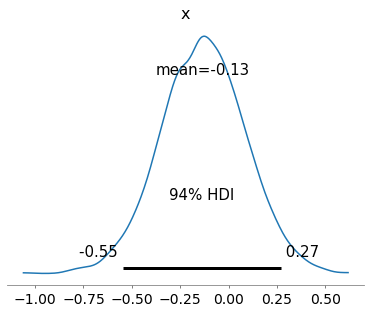

In [17]:
with basic_model:
    az.plot_posterior(trace['ads'])

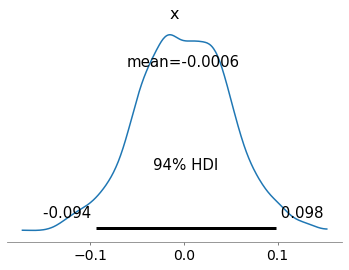

In [144]:
with basic_model:
    az.plot_posterior(trace['epsilon'])

In [18]:
# getting the mean values of the parameters as estimates:

var_weights = {}
pm.summary(trace['ads'])


arviz - WARNING - Shape validation failed: input_shape: (1, 4000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,-0.133,0.217,-0.548,0.269,0.004,0.003,2453.0,2535.0,NaN


In [33]:
trace['epsilon'].mean()

0.00036733890148491546

In [146]:
x.columns

Index(['АДС', 'АДД', 'АДП', 'ЗДВдох', 'ЗДВыдох', 'ЖЕЛ', 'Масса тела',
       'Аккомодация', 'Острота слуха', 'Стат.балансировка'],
      dtype='object')

In [19]:
column = ['ads', 'add', 'adp', 'zdin', 'zdout', 'gel', 'massa', 'akkom', 'sluh', 'balance']

var_weights['intercept'] = trace['epsilon'].mean()
for i, c in enumerate(column):
      var_weights[c] = trace[c].mean()
var_weights = pd.DataFrame(var_weights, index=[0])

# storing the standard deviation -> useful for plotting prediction distribution
# sd = trace['sigma'].mean()

In [21]:
var_weights

,intercept,ads,add,adp,zdin,zdout,gel,massa,akkom,sluh,balance
0,-0.000535,-0.133168,0.181397,0.202789,-0.015428,-0.03527,-0.123646,-0.246597,-0.023107,0.265269,-0.324299


In [54]:
var_weights.to_excel('weights_normal_model_40.xlsx')

In [152]:
var_weights['intercept'].values

array([-0.00059955])

In [24]:
bayes_test_set_scaled = np.append(np.ones((len(x_test), 1)), x_test_transformed, axis=1)
bayes_test_set_prediction_scaled = np.dot(bayes_test_set_scaled, np.array(var_weights).T)
bayes_test_set_prediction = scaller.inverse_transform(bayes_test_set_prediction_scaled)

In [19]:
from sklearn.metrics import accuracy_score, mean_absolute_error

In [26]:
mean_absolute_error(y_test, bayes_test_set_prediction)

6.131294131346451

In [28]:
student_model = pm.Model()

with student_model:

    # Priors for unknown model parameters
    ads = pm.Normal("ads", mu=-0.2, sigma=0.65)
    add = pm.Normal('add', mu = -0.35, sigma = 0.7)
    adp = pm.Normal("adp", mu = 0, sigma = 0.7)
    zdin = pm.Normal("zdin", mu = -0.4, sigma = 0.7)
    zdout = pm.Normal("zdout", mu = -0.35, sigma = 0.55)
    gel = pm.Normal("gel", mu = -0.2, sigma = 0.55)
    massa = pm.Normal("massa", mu = -0.35, sigma = 0.65)
    akkom = pm.Normal("akkom", mu = 0.2, sigma = 0.6)
    sluh = pm.Normal("sluh", mu = 0, sigma = 0.65)
    balance = pm.Normal("balance", mu = -0.2, sigma = 0.65)
    epsilon = pm.Normal("epsilon", mu=0, sigma=1)
    

    # Expected value of outcome
    mu = epsilon + ads*trans(x_train['АДС']) + add*trans(x_train['АДД']) + adp*trans(x_train['АДП']) + zdin*trans(x_train['ЗДВдох']) + \
     zdout * trans(x_train['ЗДВыдох']) + gel * trans(x_train['ЖЕЛ']) + massa * trans(x_train['Масса тела']) + \
    akkom * trans(x_train['Аккомодация']) + sluh * trans(x_train['Острота слуха']) + balance * trans(x_train['Стат.балансировка'])
        

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.StudentT("Y_obs", mu=mu, nu=10,  sigma=0.95,observed=trans(y_train))
    

In [29]:
with student_model:
    # draw 500 posterior samples
    trace1 = pm.sample(500, return_inferencedata=False)

C:\Users\Main\AppData\Roaming\Python\Python39\site-packages\pytensor\tensor\rewriting\elemwise.py:1028: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\Main\AppData\Roaming\Python\Python39\site-packages\pytensor\tensor\rewriting\elemwise.py:1028: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ads, add, adp, zdin, zdout, gel, massa, akkom, sluh, balance, epsilon]


Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 219 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


In [30]:
var_weights['intercept'] = trace1['epsilon'].mean()
for i, c in enumerate(column):
      var_weights[c] = trace1[c].mean()
var_weights = pd.DataFrame(var_weights, index=[0])

In [31]:
bayes_test_set_scaled = np.append(np.ones((len(x_test), 1)), x_test_transformed, axis=1)
bayes_test_set_prediction_scaled = np.dot(bayes_test_set_scaled, np.array(var_weights).T)
bayes_test_set_prediction = scaller.inverse_transform(bayes_test_set_prediction_scaled)

In [32]:
from sklearn.metrics import accuracy_score, mean_absolute_error

In [33]:
from scipy import stats

In [34]:
mean_absolute_error(y_test, bayes_test_set_prediction)

6.522869542724667

In [35]:
post_pred = pm.sample_posterior_predictive(trace, model=basic_model,predictions=True)

Sampling: [Y_obs]


In [36]:
y_pred = post_pred.to_dict()['predictions']['Y_obs']

In [37]:
y_pred.mean(axis = 0).mean(axis = 0).shape

(187,)

In [81]:
post_pred.to_dict()

defaultdict(dict,
            {'predictions': {'Y_obs': array([[[-2.88032057, -1.07384339,  0.88692709, ..., -0.73630486,
                        0.46585689, -0.57309309],
                      [-1.78541961, -1.15576084, -1.04016069, ..., -1.83696792,
                        1.25776808, -1.2881717 ],
                      [-1.86861827, -0.30825189, -1.44029533, ..., -1.93804685,
                       -0.85835528, -1.27179604],
                      ...,
                      [-0.30955511, -2.19921097,  0.09808243, ..., -2.32964805,
                        0.02985051, -1.37115615],
                      [-1.95000228,  0.48140666, -0.22738159, ...,  1.00073521,
                       -0.0486797 ,  0.14930129],
                      [-2.75850069, -0.06833384, -0.02221799, ..., -0.31416917,
                       -1.43928418,  0.99553627]],
              
                     [[-1.82354698, -1.06565155,  2.91547879, ..., -1.98471066,
                        0.08599421, -1.26550856],
     

In [41]:
bayes_test_set_prediction_0 = scaller.inverse_transform(y_pred.reshape(-1, 1))

In [38]:
y_pred = y_pred.mean(axis = 0).mean(axis = 0)

In [39]:
y_pred

array([ 8.93912872e-02, -2.61002766e-01,  3.69189000e-01, -7.15714784e-01,
       -1.23218949e+00,  3.26532237e-01,  7.74342221e-02,  3.97535220e-01,
        1.83725421e-01, -1.26436809e+00, -1.01542802e-01,  1.51462143e+00,
        7.12983498e-02,  1.14794786e-01, -1.10600406e+00,  2.18229702e-01,
        2.40167734e-01, -3.26738073e-01,  9.70753377e-02,  8.48878553e-02,
       -3.58510309e-01,  4.40401496e-01,  9.34153587e-01, -2.72270048e-01,
        1.06530705e-01,  1.02654577e-01, -4.47357332e-01, -5.97212200e-01,
       -1.14148186e-01, -4.16529726e-02,  9.80691256e-02, -6.47778136e-01,
        7.78254393e-02, -8.38788165e-02, -7.51628923e-01,  1.15618592e-01,
       -7.17308487e-01,  1.05185295e-01, -9.35424388e-02,  4.90001581e-01,
        4.56217729e-01,  9.42374324e-02,  1.25291870e-01,  9.70500788e-02,
       -3.90108480e-01, -3.43339942e-02,  1.17892556e+00,  1.21160431e-01,
        9.57382682e-02,  9.81683663e-01, -6.68815300e-01,  7.92102513e-02,
        1.29088989e-01,  

In [70]:
y_40.shape

(234,)

In [42]:
mean_absolute_error(y_train, bayes_test_set_prediction_0)

6.403597225426734

In [43]:
import pickle

In [44]:
model_fpath = 'bayesian_normal_man_40.pkl'

In [119]:
with open(model_fpath, 'wb') as buff:
    pickle.dump({'model': student_model, 'trace': trace1}, buff)

AttributeError: Can't pickle local object '_make_nice_attr_error.<locals>.fn'

In [45]:
import cloudpickle

Model = cloudpickle.dumps({'model': basic_model, 'trace': trace})
file = open('bayesian_normal_man_40.pkl', 'wb')
file.write(Model)

1080531

In [46]:
file = open('bayesian_normal_man_40.pkl','rb')
pickled_model = cloudpickle.loads(file.read())

In [47]:
pickled_model

{'model':     ads ~ Normal(-0.2, 0.65)
     add ~ Normal(-0.35, 0.7)
     adp ~ Normal(0, 0.7)
    zdin ~ Normal(-0.4, 0.7)
   zdout ~ Normal(-0.35, 0.55)
     gel ~ Normal(-0.2, 0.55)
   massa ~ Normal(-0.35, 0.65)
   akkom ~ Normal(0.2, 0.6)
    sluh ~ Normal(0, 0.65)
 balance ~ Normal(-0.2, 0.65)
 epsilon ~ Normal(0, 1)
   Y_obs ~ Normal(f(balance, sluh, akkom, massa, gel, zdout, zdin, adp, add, epsilon, ads), 0.95),
 'trace': <MultiTrace: 2 chains, 2000 iterations, 11 variables>}

In [48]:
post_pred_model = pm.sample_posterior_predictive(pickled_model['trace'], model=pickled_model['model'],predictions=True)

Sampling: [Y_obs]


In [49]:
y_pred_model = post_pred_model.to_dict()['predictions']['Y_obs']

In [50]:
y_pred_model = y_pred_model.mean(axis = 0).mean(axis = 0)

In [51]:
bayes_test_set_prediction_model = scaller.inverse_transform(y_pred_model.reshape(-1, 1))

In [53]:
mean_absolute_error(y_train, bayes_test_set_prediction_model)

6.393141685031782

In [80]:
poly_model = pm.Model()

with poly_model:

    # Priors for unknown model parameters
    ads = pm.Normal("ads", mu=-0.2, sigma=0.65)
    add = pm.Normal('add', mu = -0.35, sigma = 0.7)
    adp = pm.Normal("adp", mu = 0, sigma = 0.7)
    zdin = pm.Normal("zdin", mu = -0.4, sigma = 0.7)
    zdout = pm.Normal("zdout", mu = -0.35, sigma = 0.55)
    gel = pm.Normal("gel", mu = -0.2, sigma = 0.55)
    massa = pm.Normal("massa", mu = -0.35, sigma = 0.65)
    akkom = pm.Normal("akkom", mu = 0.2, sigma = 0.6)
    sluh = pm.Normal("sluh", mu = 0, sigma = 0.65)
    balance = pm.Normal("balance", mu = -0.2, sigma = 0.65)
    
    ads_2 = pm.Normal("ads_2", mu=-0.2, sigma=0.65)
    add_2 = pm.Normal('add_2', mu = -0.35, sigma = 0.7)
    adp_2 = pm.Normal("adp_2", mu = -0.2, sigma = 0.7)
    zdin_2 = pm.Normal("zdin_2", mu = -0.4, sigma = 0.7)
    zdout_2 = pm.Normal("zdout_2", mu = -0.35, sigma = 0.55)
    gel_2 = pm.Normal("gel_2", mu = -0.25, sigma = 0.55)
    massa_2 = pm.Normal("massa_2", mu = -0.4, sigma = 0.65)
    akkom_2 = pm.Normal("akkom_2", mu = -0.1, sigma = 0.6)
    sluh_2 = pm.Normal("sluh_2", mu = -0.2, sigma = 0.5)
    balance_2 = pm.Normal("balance_2", mu = -0.2, sigma = 0.4)
    epsilon = pm.Normal("epsilon", mu=-0.1, sigma=1)
    

    # Expected value of outcome
    mu = epsilon + ads*trans(x_train['АДС']) + add*trans(x_train['АДД']) + adp*trans(x_train['АДП']) + zdin*trans(x_train['ЗДВдох']) + \
     zdout * trans(x_train['ЗДВыдох']) + gel * trans(x_train['ЖЕЛ']) + massa * trans(x_train['Масса тела']) + \
    akkom * trans(x_train['Аккомодация']) + sluh * trans(x_train['Острота слуха']) + balance * trans(x_train['Стат.балансировка']) + \
    ads_2*trans(x_train['АДС']*x_train['АДС']) + add_2*trans(x_train['АДД']*x_train['АДД']) + \
    adp_2*trans(x_train['АДП']*x_train['АДП']) + zdin_2*trans(x_train['ЗДВдох']*x_train['ЗДВдох']) + \
     zdout_2 * trans(x_train['ЗДВыдох']*x_train['ЗДВыдох']) + gel_2 * trans(x_train['ЖЕЛ']*x_train['ЖЕЛ']) + \
    massa_2 * trans(x_train['Масса тела']*x_train['Масса тела']) + \
    akkom_2 * trans(x_train['Аккомодация']*x_train['Аккомодация']) + \
    sluh * trans(x_train['Острота слуха']*x_train['Острота слуха']) + \
    balance * trans(x_train['Стат.балансировка']*x_train['Стат.балансировка'])
        
        

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=0.95, observed=trans(y_train))

In [81]:
with poly_model:
    # draw 500 posterior samples
    trace_p = pm.sample(500, return_inferencedata=False)

C:\Users\Main\AppData\Roaming\Python\Python39\site-packages\pytensor\tensor\rewriting\elemwise.py:1028: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\Main\AppData\Roaming\Python\Python39\site-packages\pytensor\tensor\rewriting\elemwise.py:1028: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(
C:\Users\Main\AppData\Roaming\Python\Python39\site-packages\pytensor\tensor\rewriting\elemwise.py:1028: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(
C:\Users\Main\AppData\Roaming\Python\Python39\site-packages\pytensor\tensor\rewriting\elemwise.py:1028: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(
C:\Users\Main\AppData\Roaming\Python\Python39\site-packages\pytensor\tensor\rewr

Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 157 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


In [86]:
column = ['ads', 'add', 'adp', 'zdin', 'zdout', 'gel', 'massa', 'akkom', 'sluh', 'balance', 
         'ads_2', 'add_2', 'adp_2', 'zdin_2', 'zdout_2', 'gel_2', 'massa_2', 'akkom_2', 'sluh_2', 'balance_2']

In [87]:
var_weights['intercept'] = trace_p['epsilon'].mean()
for i, c in enumerate(column):
      var_weights[c] = trace_p[c].mean()
var_weights = pd.DataFrame(var_weights, index=[0])

In [88]:
var_weights

,intercept,ads,add,adp,zdin,zdout,gel,massa,akkom,sluh,...,ads_2,add_2,adp_2,zdin_2,zdout_2,gel_2,massa_2,akkom_2,sluh_2,balance_2
0,0.000926,0.080478,0.14357,0.059028,-0.211204,0.284155,-0.170097,-0.291489,-0.127335,0.122861,...,-0.220063,0.044921,0.157644,0.171059,-0.31218,0.02435,0.05554,0.105858,-0.201244,-0.211809


In [94]:
y_pred_2 = var_weights['intercept'] + var_weights['ads']*trans(x_test['АДС']) + \
var_weights['add']*trans(x_test['АДД']) + var_weights['adp']*trans(x_test['АДП']) + \
var_weights['zdin']*trans(x_test['ЗДВдох']) + \
     var_weights['zdout'] * trans(x_test['ЗДВыдох']) + \
var_weights['gel'] * trans(x_test['ЖЕЛ']) + var_weights['massa'] * trans(x_test['Масса тела']) + \
    var_weights['akkom'] * trans(x_test['Аккомодация']) + \
var_weights['sluh'] * trans(x_test['Острота слуха']) + \
var_weights['balance'] * trans(x_test['Стат.балансировка']) + \
    var_weights['ads_2']*trans(x_test['АДС']*x_test['АДС']) + \
var_weights['add_2']*trans(x_test['АДД']*x_test['АДД']) + \
    var_weights['adp_2']*trans(x_test['АДП']*x_test['АДП']) + \
var_weights['zdin_2']*trans(x_test['ЗДВдох']*x_test['ЗДВдох']) + \
     var_weights['zdout_2'] * trans(x_test['ЗДВыдох']*x_test['ЗДВыдох']) + \
var_weights['gel_2'] * trans(x_test['ЖЕЛ']*x_test['ЖЕЛ']) + \
    var_weights['massa_2'] * trans(x_test['Масса тела']*x_test['Масса тела']) + \
    var_weights['akkom_2'] * trans(x_test['Аккомодация']*x_test['Аккомодация']) + \
    var_weights['sluh'] * trans(x_test['Острота слуха']*x_test['Острота слуха']) + \
    var_weights['balance'] * trans(x_test['Стат.балансировка']*x_test['Стат.балансировка'])
        

In [96]:
y_pred_2

0    -0.359748
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
30         NaN
31         NaN
32         NaN
33         NaN
34         NaN
35         NaN
36         NaN
37         NaN
38         NaN
39         NaN
40         NaN
41         NaN
42         NaN
43         NaN
44         NaN
45         NaN
46         NaN
dtype: float64

In [89]:
bayes_test_set_scaled_2 = np.append(np.ones((len(x_test), 1)), x_test_transformed, axis=1)
bayes_test_set_scaled_2 = np.append(bayes_test_set_scaled_2, x_test_transformed*x_test_transformed, axis=1)
bayes_test_set_prediction_scaled_2 = np.dot(bayes_test_set_scaled_2, np.array(var_weights).T)
bayes_test_set_prediction_2 = scaller.inverse_transform(bayes_test_set_prediction_scaled_2)

In [92]:
bayes_test_set_scaled_2.shape

(47, 21)

In [90]:
mean_absolute_error(y_test, bayes_test_set_prediction_2)

10.07691494134328